In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import sympy as sy
import math
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
k= 1
k1 = 0.5
m = 1
xaeq = 1
xbeq = 1.2

In [11]:
N=100000
tfinal=40
va0= 0
vb0= 0

xta= np.empty(N)
xta[0]=xaeq + 0.05 #condições dadas
xtb= np.empty(N)
xtb[0]=xbeq

vta= np.empty(N)
vta[0]=va0
vtb= np.empty(N)
vtb[0]=vb0

t= np.empty(N)
t[0] = 0
dt=tfinal/N

maximum = []
minimum = []

period_list = []
amp_list = []

In [12]:
def maxminv(x0,x1,x2,y0,y1,y2):
 # Máximo ou mínimo usando o polinómio de Lagrange
 # Dados (input): (x0,y0), (x1,y1) e (x2,y2)
 # Resultados (output): xm, ymax
 xab=x0-x1
 xac=x0-x2
 xbc=x1-x2
 a=y0/(xab*xac)
 b=-y1/(xab*xbc)
 c=y2/(xac*xbc)
 xmla=(b+c)*x0+(a+c)*x1+(a+b)*x2
 xm=0.5*xmla/(a+b+c)
 xta=xm-x0
 xtb=xm-x1
 xtc=xm-x2
 ymax=a*xtb*xtc+b*xta*xtc+c*xta*xtb
 return xm, ymax

In [13]:
def eulercromer():
    for i in range(N-1):
        axa = (-k*(xta[i] -xaeq) - k1 * ((xta[i] -xaeq) - (xtb[i] - xbeq)))/m
        axb = (-k*(xtb[i] - xbeq) + k1 * ((xta[i] -xaeq) - (xtb[i] - xbeq)))/m

                
        vta[i+1]=vta[i]+axa*dt
        vtb[i+1]=vtb[i]+axb*dt
        
        
        xta[i+1]=xta[i]+vta[i+1]*dt
        xtb[i+1]=xtb[i]+vtb[i+1]*dt

        t[i+1] = t[i] + dt
        
        if xta[i-1] < xta[i] > xta[i+1]:
            t0, t1, t2 = (i-1)*dt, i*dt, (i+1)*dt
            y0, y1, y2 = xta[i-1], xta[i], xta[i+1]
            xm, xmax = maxminv(t0, t1, t2, y0, y1, y2)
            maximum.append([xm, xmax])
        if xta[i-1]> xta[i] < xta[i+1]:
            t0, t1, t2 = (i-1)*dt, i*dt, (i+1)*dt
            y0, y1, y2 = xta[i-1], xta[i], xta[i+1]
            xm, xmin = maxminv(t0, t1, t2, y0, y1, y2)
            minimum.append([xm, xmin])
        
    return
eulercromer()

C:\Users\João Farias\AppData\Local\Temp\ipykernel_14836\3235507451.py:8: RuntimeWarning: overflow encountered in scalar divide
  a=y0/(xab*xac)
C:\Users\João Farias\AppData\Local\Temp\ipykernel_14836\3235507451.py:11: RuntimeWarning: invalid value encountered in scalar multiply
  xmla=(b+c)*x0+(a+c)*x1+(a+b)*x2


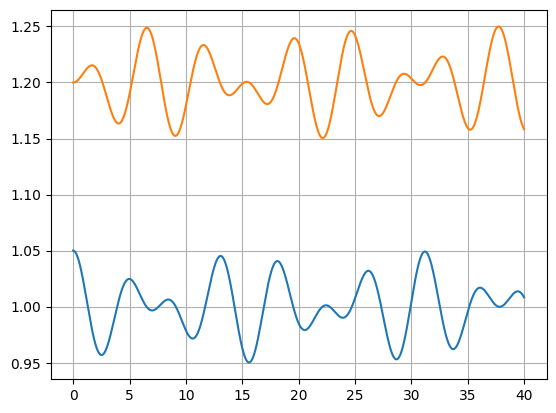

In [14]:
offset = 0.5 #just to visually push the graphs up so they're separate

plt.plot(t, xta, linestyle="-")
plt.plot(t, xtb, linestyle="-")
plt.grid(True)
plt.show()

In [15]:
#Caso 1 - xa0 = xaeq + 0.05; xb0 = xbeq + 0.05 -> Movimento harmónico Simples
#Caso 2 - xa0 = xaeq + 0.05; xb0 = xbeq - 0.05 -> Movimento periódico sinusoidal com os dois corpos sempre com velocidades opostas
#Caso 3 - xa0 = xaeq + 0.05; xb0 = xbeq -> Movimento irregular, com maior amplitude alternando entre os dois corpos. Com mais
                                           #tempo pode ser possível observar movimento periódico.

In [16]:
def calculate_period():
    for i in range(1, len(maximum)):
        period_list.append(maximum[i][0]-maximum[i-1][0])
    estimated_period= (sum(period_list)/len(period_list))
    return estimated_period
def calculate_amplitude():
    avg_max = sum(x[1] for x in maximum) / len(maximum)
    avg_min = sum(x[1] for x in minimum) / len(minimum)
    return abs(avg_max - avg_min) / 2

T = calculate_period()
Amp = calculate_amplitude()
w = 2*math.pi*(1/T)

In [17]:
print(T, w) #Se der erro, restart kernel

nan nan


In [18]:
#Correspondem às frequências dos modos normais 1 e 2, que são calculadas por sqrt(k/m) e
# sqrt((k+2*k1)/m)